# OPTIMIZATION TECHNIQUES FINAL PROJECT:- #

PROGRAMMING LANGUAGES:- Python

In [61]:
# Importing all the required packages for this project:-

import pandas as pd
import dill # To save the current python session [Uses Pickle concept]
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import category_encoders as ce
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE # Imbalanced learn library

# IMPORTING THE 1ST CSV FILE:- #

In [11]:
# Loading the Dataframe using Pandas library

df=pd.read_csv("/Users/ruthvikrajam.v/Desktop/Customer_Churn.csv"); 

In [12]:
sample=df.sample(5); 
print(sample); # Prints sample data, used for better illustration

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
3532  9474-PHLYD  Female              0      No         No      15   
5270  6682-QJDGB    Male              0      No        Yes      40   
1749  1320-REHCS    Male              1      No         No      52   
1037  4581-LNWUM  Female              0      No         No      13   
5865  2621-UDNLU  Female              0     Yes         No       3   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
3532          Yes                No             DSL                   No  ...   
5270          Yes                No             DSL                  Yes  ...   
1749          Yes               Yes     Fiber optic                   No  ...   
1037           No  No phone service             DSL                   No  ...   
5865          Yes                No              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV  \
3532                 

In [13]:
df.columns # Prints all the Columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
# From the above Dataframe, it is clear that the customerID is not useful for predicting the 
 # output so dropping the column customerID:-

df.drop("customerID",axis="columns",inplace=True);
df.dtypes # Prints the data-type of each column in the Dataframe

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
# The TotalCharges is of type "object" but it has to be of "integer" type

df["TotalCharges"].values # The values are of type ->  "string"

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [16]:
df["MonthlyCharges"].values # whereas here the values are of type -> "int"

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [17]:
# Converting the TotalCharges column into "int" type:-

pd.to_numeric(df["TotalCharges"], errors="coerce")

# The above function will convert it into numeric type and also if there are NA values, those values are not 
 # considered

# Extracting all the rows with TotalCharges -> NULL

df1=df[pd.to_numeric(df["TotalCharges"], errors="coerce").isnull()]
df1.shape # -> 11 rows with NULL values

df2=df[df.TotalCharges!=" "]

df2.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [18]:
df2.TotalCharges=pd.to_numeric(df2.TotalCharges)

# The below function is used to check if there are any NULL values in the Dataset

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# Data Analysis:- #

If Churn = "Yes" [Leaving the Service Provider] else if Churn = "No" [Not leaving the Service Provider]

Text(0.5, 1.0, 'Customer Churn Analysis using Tenure')

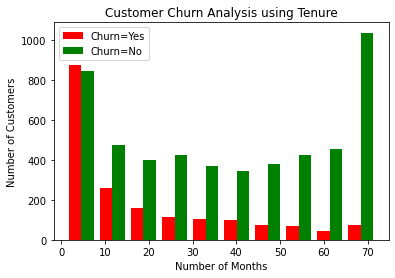

In [19]:
tenure_churn_no=df2[df2["Churn"]=="No"].tenure # Not leaving the Company

tenure_churn_yes=df2[df2["Churn"]=="Yes"].tenure # Leaving the Company

# Plotting the Graph using Matplot library

plt.hist([tenure_churn_yes, tenure_churn_no], color=["red", "green"], label=["Churn=Yes", "Churn=No"])
plt.legend()
plt.xlabel("Number of Months")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Analysis using Tenure")

Text(0.5, 1.0, 'Customer Churn Analysis using Monthly Charges')

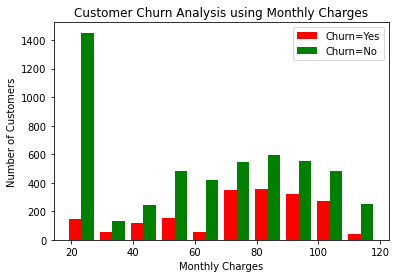

In [20]:
# From the above graph, it is clear that the customers with tenure period more than 50 months are less likely to churn 
 # from the company whereas customers with tenure period less than 10 months are more likely to churn from the company
 
MonthlyCharges_churn_no=df2[df2["Churn"]=="No"].MonthlyCharges # Not leaving the Company

MonthlyCharges_churn_yes=df2[df2["Churn"]=="Yes"].MonthlyCharges # Leaving the Company

plt.hist([MonthlyCharges_churn_yes, MonthlyCharges_churn_no], color=["red", "green"], label=["Churn=Yes", "Churn=No"])
plt.legend()
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Analysis using Monthly Charges")

In [21]:
# From the above graph it is clear that the customers who are paying very less and high monthly charges are not leaving the company
 # whereas the customers who are paying Monthly Charges around $70 - $100 are having 50-50 chances of leaving the company

# The following code prints the unique values in each column:-

for column in df2:
    print(column , df2[column].unique())

def print_unique_col_values(df):
   for column in df:
       if df[column].dtypes=="object":
               print(column, df[column].unique())
        
print_unique_col_values(df2);

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   

In [22]:
# Replacing "No internet service" and "No phone service" with "No" for easy understanding:-
 
df2.replace("No internet service", "No", inplace=True);
df2.replace("No phone service", "No", inplace=True);

print_unique_col_values(df2);

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [23]:
# Now let us analyze all the columns with values "Yes" (or) "No":-
# Since AI algorithms dont know categorical values, replacing "Yes" and "No" values with 1 and 0:-
# "Not leaving the company -> 0 and Leaving the company -> 1. 

yes_no_columns=["Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity",
"OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"]

for col in yes_no_columns:
    df2[col].replace({"Yes":1, "No":0}, inplace=True);
    
df3=pd.get_dummies(data=df2, columns=["InternetService", "Contract", "PaymentMethod"]);    
df3.columns

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [24]:
# Let us mention for Male = 0, Female = 1

df3.replace({"Male":0, "Female":1}, inplace=True); 

df3.dtypes # Now, all the columns are of integer type

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [25]:
# Scaling the Dataset:-
# tenure, MonthlyCharges and TotalCharges has to be scaled whereas the range of remaining
 # columns are between 0 and 1:

cols_to_scale=["tenure", "MonthlyCharges", "TotalCharges"];
scaler=MinMaxScaler() # Creating an object for MinMaxScaler
     
df4=df3.copy();
df4[cols_to_scale]=scaler.fit_transform(df4[cols_to_scale]);

In [26]:
# Splitting the Dataset for training and testing:-

X=df4.drop("Churn", axis="columns");
y=df4["Churn"];

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5);

In [27]:
#### Building a Neural Network for Prediction ####:-

model=Sequential();

model.add(Dense(26, input_dim=X_train.shape[1], activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))

model.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()));
model.add(Dense(8, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()));
model.add(Dense(1, activation="sigmoid", kernel_initializer=tf.keras.initializers.GlorotNormal())); # Glorot Normal (or) Xavier Normal


model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]);
model.fit(X_train, y_train, epochs=100);

test = [round(x[0]) for x in model.predict(X_test)];
print(accuracy_score(y_test, test)); # Training accuracy score of 84.5%

2022-04-10 15:38:52.642733: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4922 - accuracy: 0.7618
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.7915
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.7956
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.7989
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.7988
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8048
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4125 - accuracy: 0.8059
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4109 - accuracy: 0.8053
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8066
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4083 - accura

In [28]:
print(classification_report(y_test, test)); # Prints the classification report 


              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.65      0.53      0.58       408

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



In [ ]:
# From above, it is clear that the model is not performing well for the class 1 i.e Customers leaving from the 
 # company so, to overcome this problem SMOTE method was implemented on the 2nd Dataset.

# The 1st Dataset is used to analyse the features that are present and to draw some insights for making optimal 
 # predictions
 

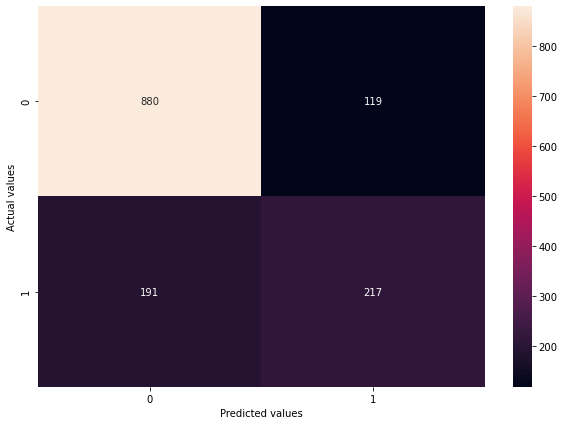

In [29]:
# Confusion Matrix [Performance Metric]:-

cm=tf.math.confusion_matrix(labels=y_test, predictions=test);

plt.figure(figsize=(10,7));
sns.heatmap(cm, annot=True, fmt="d");
plt.xlabel("Predicted values");
plt.ylabel("Actual values");

# IMPORTING THE 2ND CSV FILE:- #

In [30]:
# Importing the Datasets for train and test:-
# The test DataFrame is just for our reference to find the target value but doesn't consists of any output values.

train=pd.read_csv("/Users/ruthvikrajam.v/Desktop/train.csv");
test=pd.read_csv("/Users/ruthvikrajam.v/Desktop/test.csv");

In [31]:
# List of columns:-

train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [32]:
# Shape of DataFrame:-

print(train.shape);

(4250, 20)


In [33]:
train.info(); # To check if there are any null values in the Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [35]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Data Analysis:- #

##################################### Univariate Analysis ######################################### :-

In [36]:
## Categorical Variables ##:-
# Storing all the categorical features

categorical_variables=[];
categorical_variables=[feature for feature in train.columns if train[feature].dtype=="O"];

# Function to calculate percentage for each feature:-

def calculate_percentage(total, ax):
    for patch in ax.patches:
        percentage="{}%".format(round(100*(patch.get_height()/total),1));
        x=patch.get_x()+(patch.get_width()/2);
        y=patch.get_height();
        ax.annotate(percentage, (x, y), ha="center");   

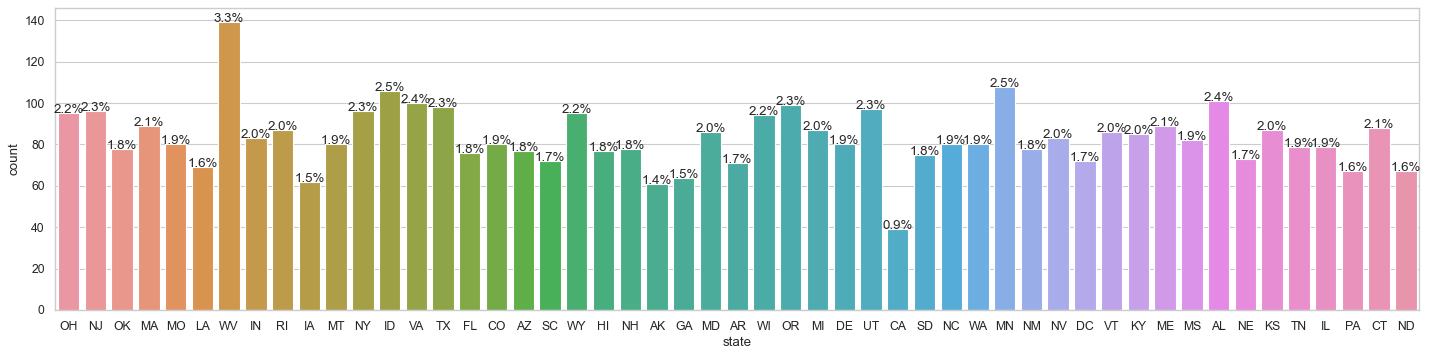

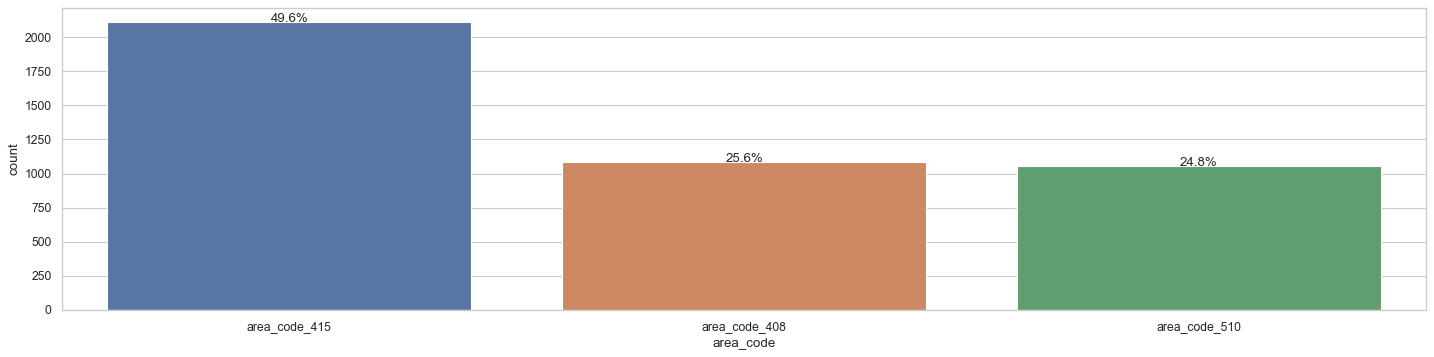

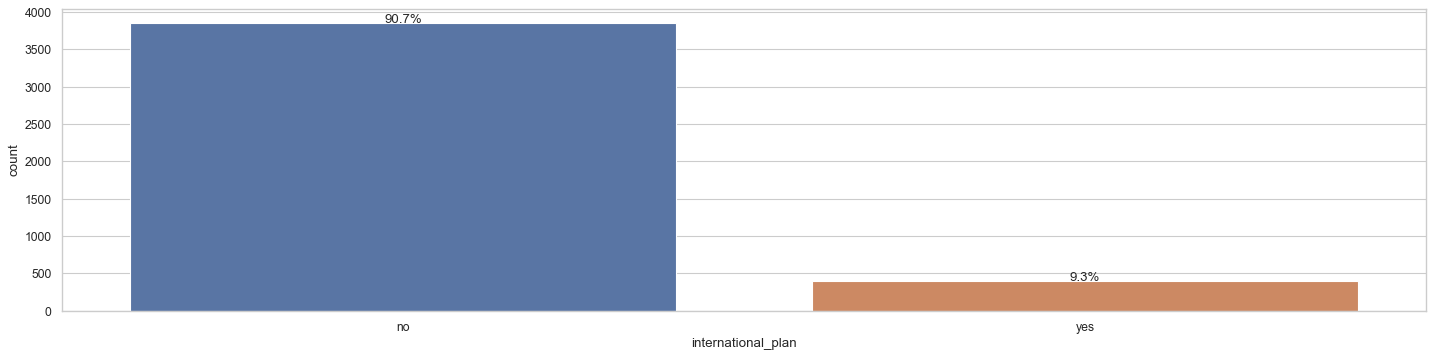

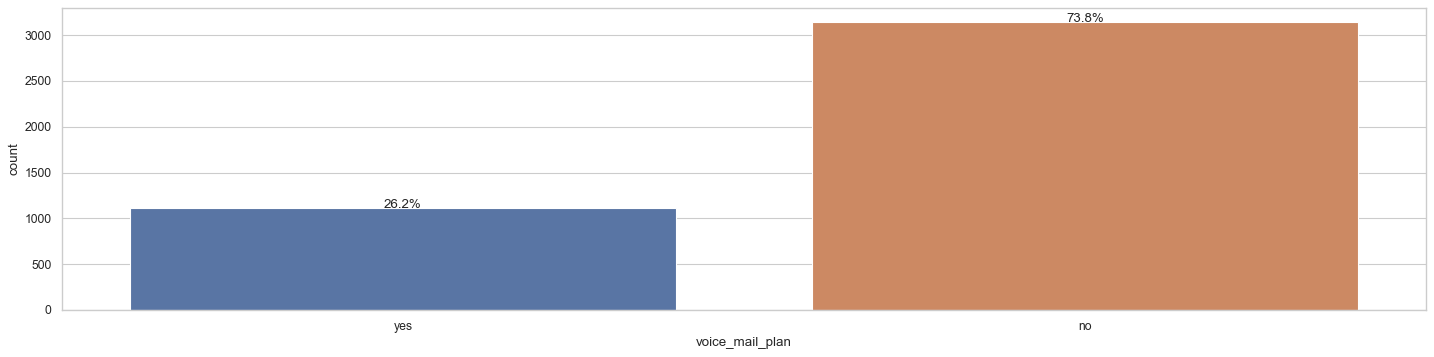

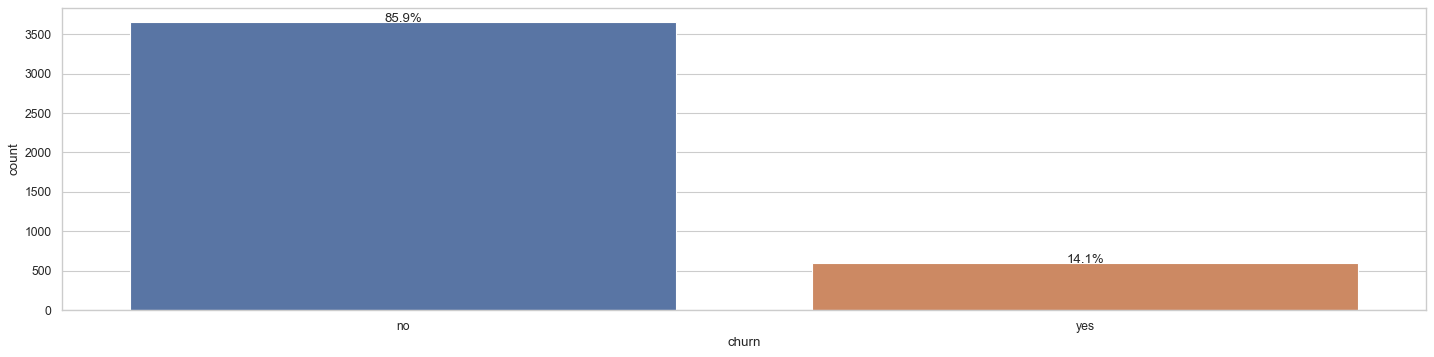

In [37]:
# Plotting countplot for each categorical variable by using the above function:-

for feature in categorical_variables:
    sns.set(style="whitegrid");
    plt.figure(figsize=(22,5), dpi=80);
    total=len(train);
    ax=sns.countplot(x=train[feature], data=train);
    calculate_percentage(total, ax);
    plt.show();

In [38]:
# From above plots it is clear that:-
 # 90.7% of the customers don't have international plan
 # 73.8% of the customers don't have voice mail plan
 # 49.6% of the customers are staying at area code 415
 # Only 14.1% of the customers churn from the company

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


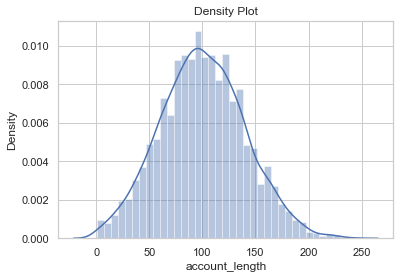

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


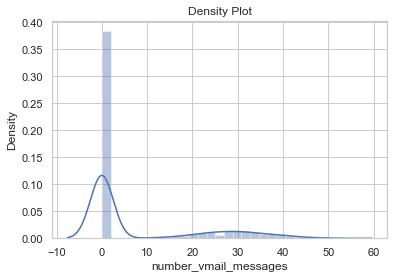

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


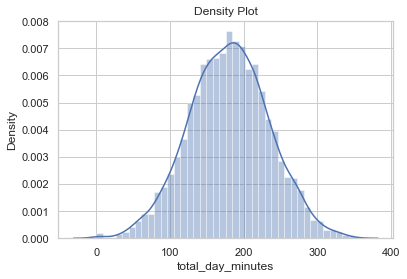

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


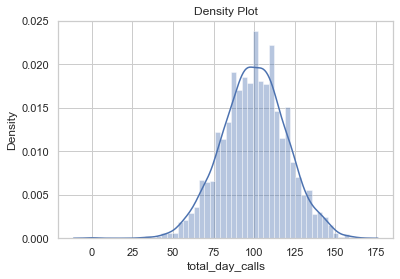

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


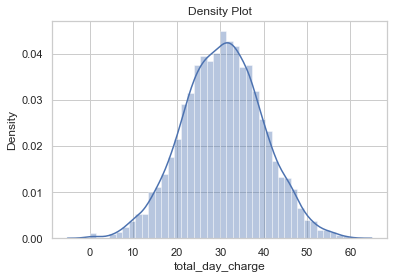

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


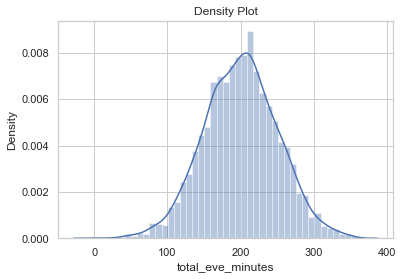

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


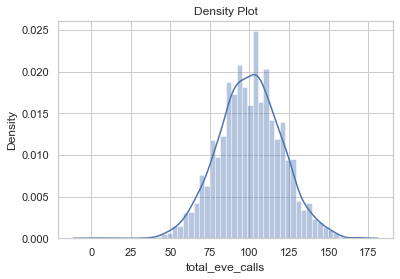

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


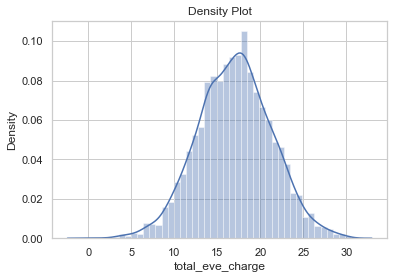

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


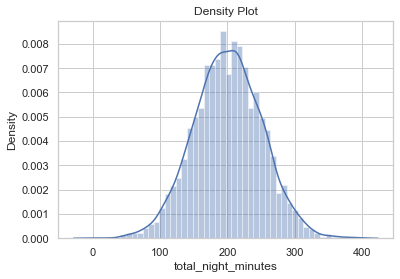

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


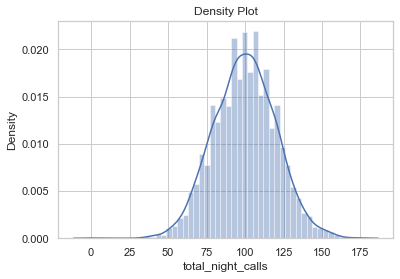

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


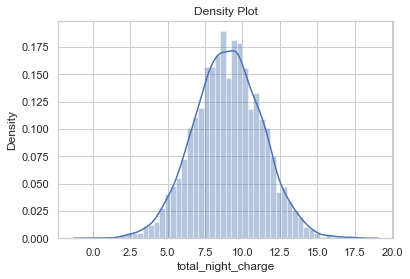

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


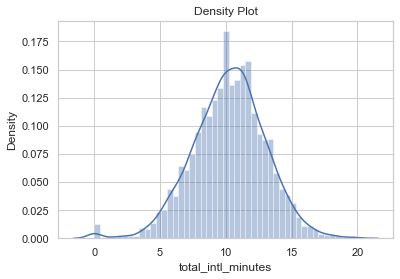

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


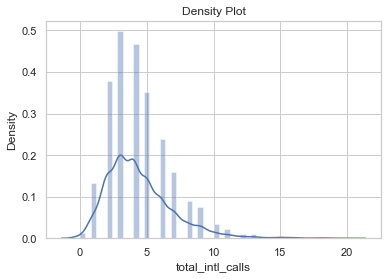

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


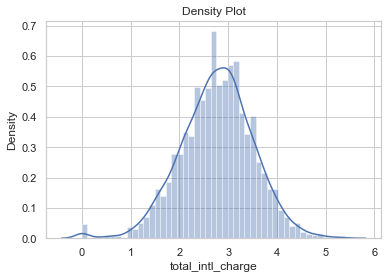

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


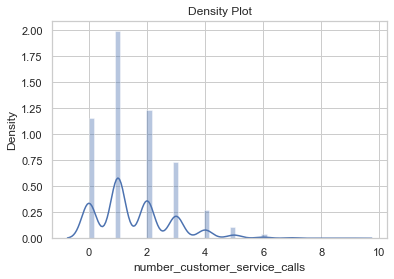

In [39]:
## Numerical Variables ##:-
# Storing all the numerical features

numerical_variables=[];
numerical_variables=[feature for feature in train.columns if train[feature].dtype!="O"];

# Plotting Density plots for each numerical variable by using the above function:-

for feature in numerical_variables:
    sns.distplot(train[feature]);
    plt.xlabel(feature);
    plt.ylabel("Density");
    plt.title("Density Plot");
    plt.show();

In [40]:
# From the above graphs it is clear that:-
 # Few features are skewed means, they dont show Normal distribution
 # in the Dataset so, those features values has to be converted to Normal distribution.
 
# Features like number_customer_service_calls, total_intl_calls and number_vmail_messages don't show
 # Normal Distribution.

##################################### Bivariate Analysis ######################################### :-

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


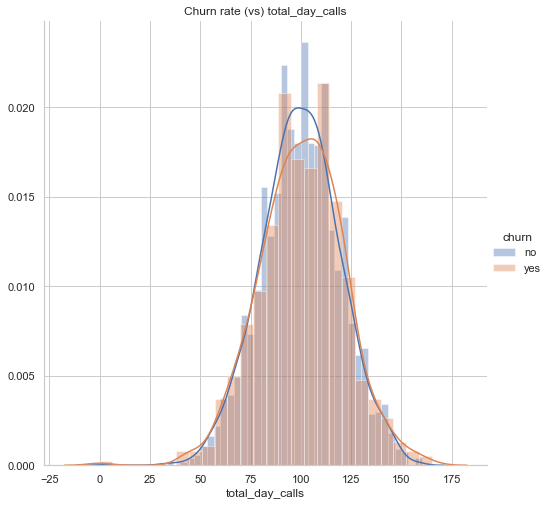

In [43]:
sns.FacetGrid(train, hue="churn", size=7).map(sns.distplot, "total_day_calls").add_legend();
plt.title("Churn rate (vs) total_day_calls");
plt.show();

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


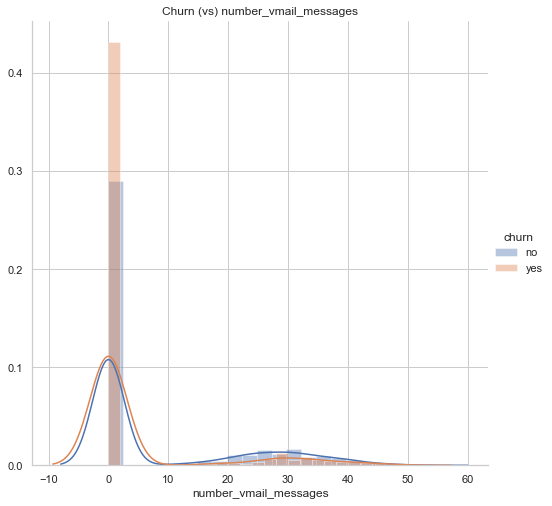

In [42]:
sns.FacetGrid(train, hue="churn", size=7).map(sns.distplot, "number_vmail_messages").add_legend();
plt.title("Churn (vs) number_vmail_messages");
plt.show();

#### Outliers ####:-

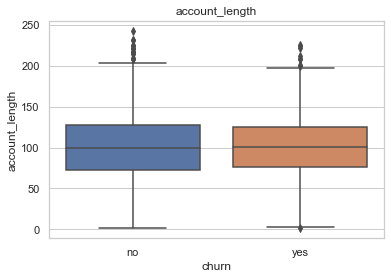

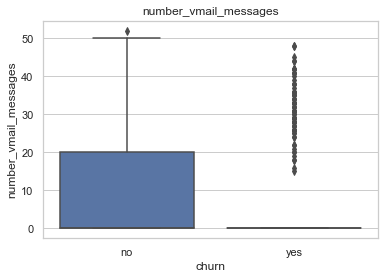

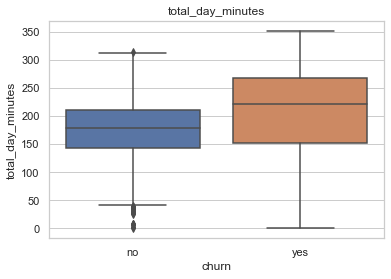

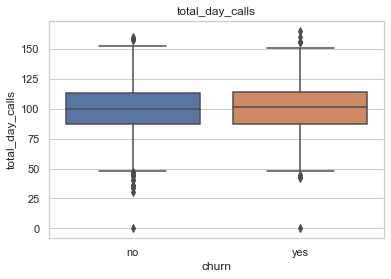

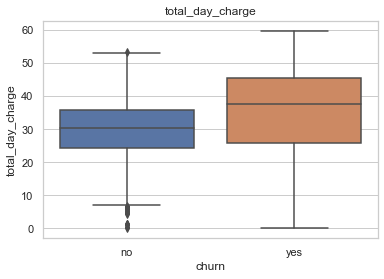

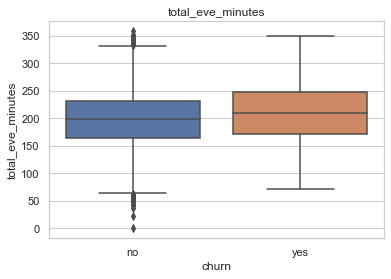

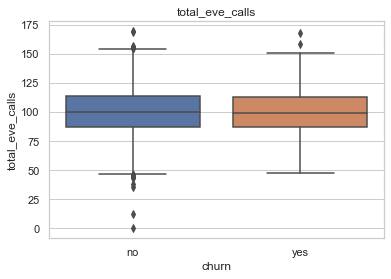

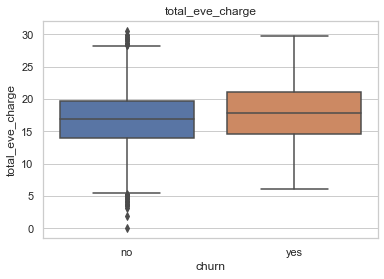

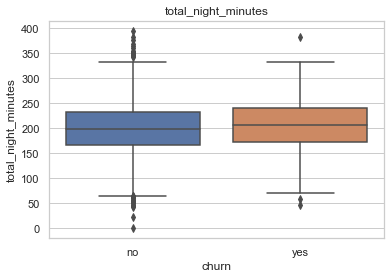

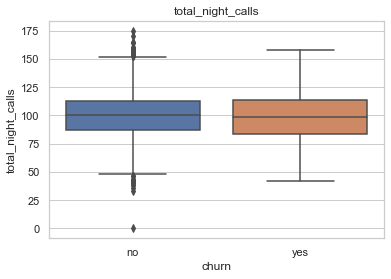

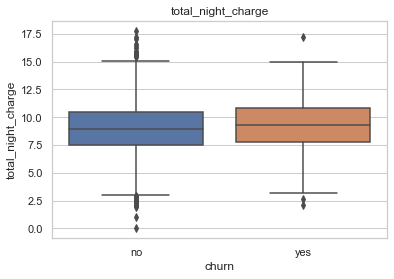

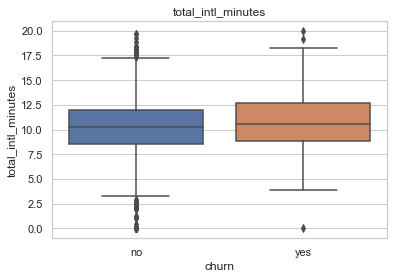

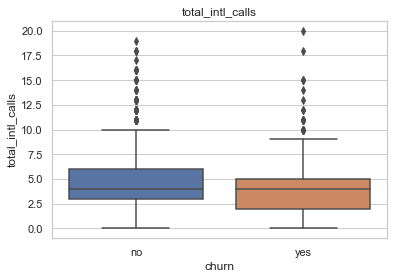

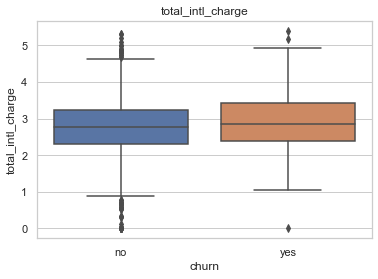

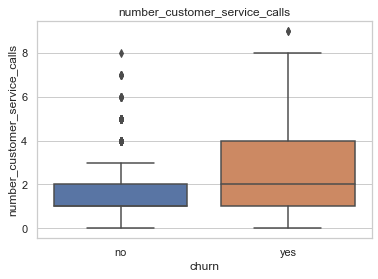

In [44]:
## Numerical features ##:-
# Seaborn gives better visualisation than pandas so, seaborn was used:-
for feature in numerical_variables:
    sns.boxplot(x="churn", y=feature, data=train);
    plt.title(feature);
    plt.show();

In [ ]:
# From above it is clear that:-
 # Every feature contains outliers so those outliers have to be removed.
 

In [45]:
# Replacing the outliers with their median values and storing it in a new DataFrame:- 

def eliminate_outliers(df, labels):
    for feature in labels:
        quantile1=df[feature].quantile(0.25);
        quantile2=df[feature].quantile(0.75);
        
        iqr=quantile2 - quantile1;
        upper_bound=quantile2 + 1.5*iqr;
        lower_bound=quantile1 - 1.5*iqr;
        
        df[feature]=df[feature].mask(df[feature]<lower_bound, df[feature].median(), axis=0);
        df[feature]=df[feature].mask(df[feature]>upper_bound, df[feature].median(), axis=0);
        
    return df;

train_eliminate_outliers=eliminate_outliers(train, numerical_variables);

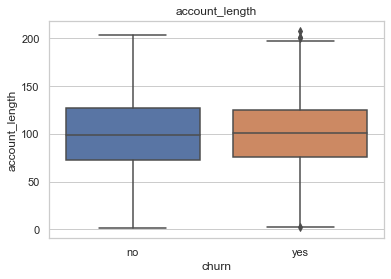

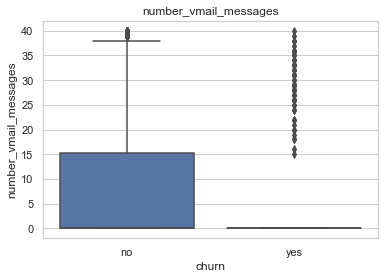

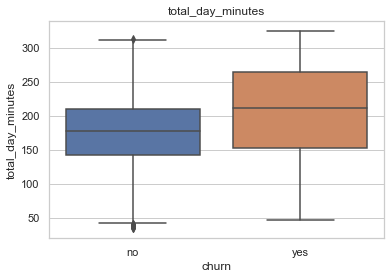

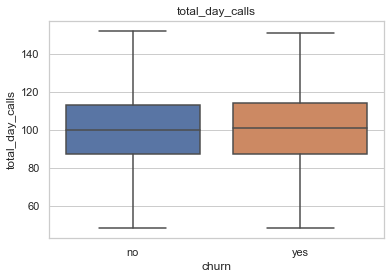

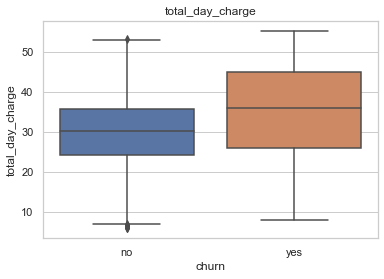

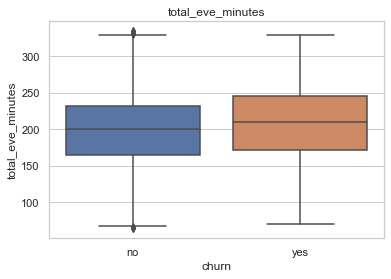

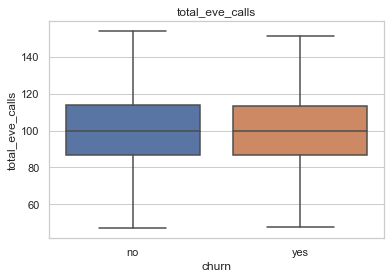

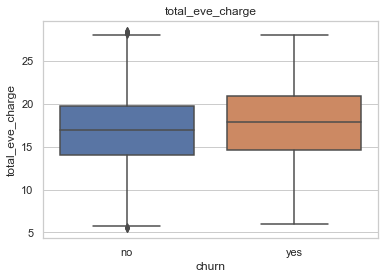

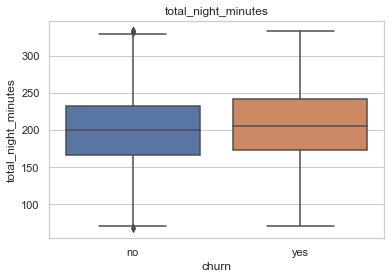

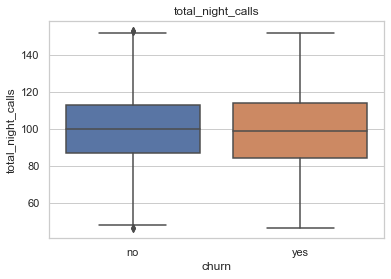

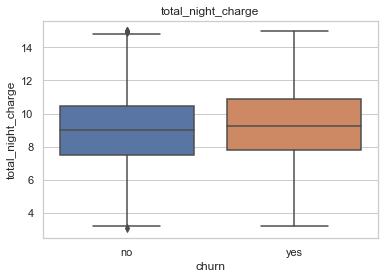

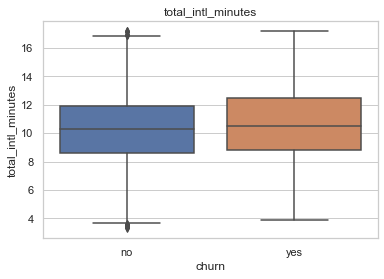

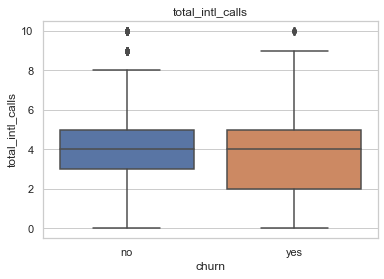

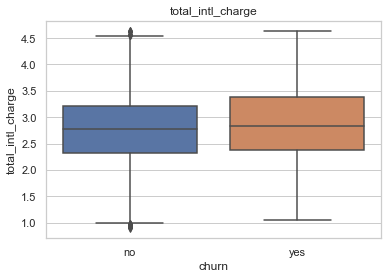

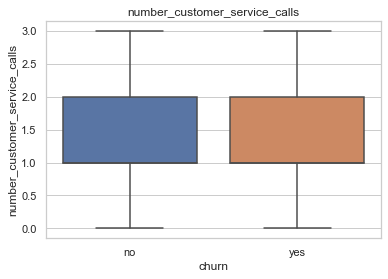

In [46]:
## Box plots after removing outliers ##

for feature in numerical_variables:
    sns.boxplot(x="churn", y=feature, data=train_eliminate_outliers);
    plt.title(feature);
    plt.show();


In [47]:
#### Handling Categorical features ####

# nunique() function is used to find the number of distinct values in a Column:-

train_eliminate_outliers["state"].nunique()

51

In [ ]:
# From above, it is clear that the state feature has 51 distinct values.
 
 # Thereby, if I implement One Hot Encoder on the state feature then it creates 51 different features and there is a chance
 # of Overfitting i.e categorical data can pose a serious problem if they have high cardinality which means too many unique
 # values.
 
 # So, to overcome this problem Hash Encoder is used.
  # (https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/)

In [49]:
hash_object=ce.HashingEncoder(cols="state")

train_hash=hash_object.fit_transform(train_eliminate_outliers);
test_hash=hash_object.fit_transform(test);

train_hash.head() # If we put " ; " after the statement then the head() function doesn't works.

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107,area_code_415,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0,1,0,0,0,0,0,0,137,area_code_415,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,0,0,0,0,1,0,0,0,84,area_code_408,...,88,17.06,196.9,89,8.86,6.6,7,1.78,2,no
3,0,0,0,0,1,0,0,0,75,area_code_415,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0,0,0,0,1,0,0,0,121,area_code_510,...,108,17.06,212.6,118,9.57,7.5,7,2.03,3,no


In [52]:
#### Replacing "No" with 0 and "Yes" with 1 for categorical feature values:- ####

train_hash.international_plan.replace(["no", "yes"], [0, 1], inplace=True);
train_hash.voice_mail_plan.replace(["no", "yes"], [0, 1], inplace=True);
train_hash.churn.replace(["no", "yes"], [0, 1], inplace=True);

test_hash.international_plan.replace(["no", "yes"], [0, 1], inplace=True);
test_hash.voice_mail_plan.replace(["no", "yes"], [0, 1], inplace=True);

train_hash.head();

In [54]:
print(train_hash["churn"]);

0       0
1       0
2       0
3       0
4       0
       ..
4245    0
4246    0
4247    0
4248    0
4249    0
Name: churn, Length: 4250, dtype: int64


In [53]:
## In the DF the area_code feature is of type "Object", need to convert to "Numerical" ##

train_hash=pd.get_dummies(train_hash, columns=["area_code"]);
train_hash.info();

# Thereby the area_code feature has been converted to integer type from object type for train data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   col_0                          4250 non-null   int64  
 1   col_1                          4250 non-null   int64  
 2   col_2                          4250 non-null   int64  
 3   col_3                          4250 non-null   int64  
 4   col_4                          4250 non-null   int64  
 5   col_5                          4250 non-null   int64  
 6   col_6                          4250 non-null   int64  
 7   col_7                          4250 non-null   int64  
 8   account_length                 4250 non-null   int64  
 9   international_plan             4250 non-null   int64  
 10  voice_mail_plan                4250 non-null   int64  
 11  number_vmail_messages          4250 non-null   int64  
 12  total_day_minutes              4250 non-null   f

In [55]:
test_hash=pd.get_dummies(test_hash, columns=["area_code"]);
test_hash.info();

# Thereby the area_code feature has been converted to integer type from object type for test data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   col_0                          750 non-null    int64  
 1   col_1                          750 non-null    int64  
 2   col_2                          750 non-null    int64  
 3   col_3                          750 non-null    int64  
 4   col_4                          750 non-null    int64  
 5   col_5                          750 non-null    int64  
 6   col_6                          750 non-null    int64  
 7   col_7                          750 non-null    int64  
 8   id                             750 non-null    int64  
 9   account_length                 750 non-null    int64  
 10  international_plan             750 non-null    int64  
 11  voice_mail_plan                750 non-null    int64  
 12  number_vmail_messages          750 non-null    int

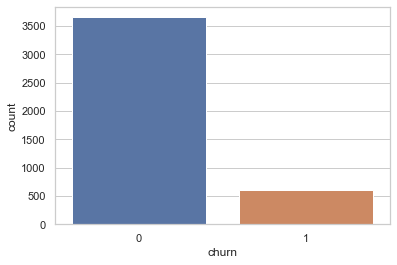

In [56]:
#### Now let us handle the dataset with imbalanced classes ####

sns.countplot(x="churn", data=train_hash);
plt.show();
# 0 -> No Churn, 1 -> Churn

In [57]:
x=train_hash.drop("churn", axis=1).values
y=train_hash.churn.values

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=0);

In [58]:
print("Before Upsampling the count of class 0 {}".format(sum(y_train==0)));
print("Before Upsampling the count of class 1 {}".format(sum(y_train==1)));

Before Upsampling the count of class 0 2550
Before Upsampling the count of class 1 425


In [59]:
## Upsampling the Minority class i.e class 1 -> Applied on the Training set only ##
 # Synthetic Minority Oversampling Technique (SMOTE) #
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

sm=SMOTE(sampling_strategy=1);
x_train_smote, y_train_smote=sm.fit_resample(x_train, y_train);

print("After Upsampling {}".format(sum(y_train_smote==0))); # class 0
print("After Upsampling {}".format(sum(y_train_smote==1))); # class 1

After Upsampling 2550
After Upsampling 2550


In [60]:
#### Scaling the Dataset using MinMax Scaler ####

scaler=MinMaxScaler();
x_train_smote_scale=scaler.fit_transform(x_train_smote);
x_test_scale=scaler.fit_transform(x_test);

In [71]:
# GD Optmizer when batch size = 1

model=Sequential();

model.add(Dense(28, input_dim=x_train_smote_scale.shape[1], activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))

model.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()));
model.add(Dense(8, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()));
model.add(Dense(1, activation="sigmoid", kernel_initializer=tf.keras.initializers.GlorotNormal())); # Glorot Normal (or) Xavier Normal

model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"]);
model.fit(x_train_smote_scale, y_train_smote,epochs=100, batch_size=1);

Epoch 1/100
5100/5100 [==============================] - 8s 2ms/step - loss: 0.5752 - accuracy: 0.7055
Epoch 2/100
5100/5100 [==============================] - 8s 2ms/step - loss: 0.4993 - accuracy: 0.7686
Epoch 3/100
5100/5100 [==============================] - 8s 1ms/step - loss: 0.4600 - accuracy: 0.7875
Epoch 4/100
5100/5100 [==============================] - 11s 2ms/step - loss: 0.4244 - accuracy: 0.8106
Epoch 5/100
5100/5100 [==============================] - 10s 2ms/step - loss: 0.3915 - accuracy: 0.8278
Epoch 6/100
5100/5100 [==============================] - 8s 2ms/step - loss: 0.3702 - accuracy: 0.8439
Epoch 7/100
5100/5100 [==============================] - 9s 2ms/step - loss: 0.3447 - accuracy: 0.8478
Epoch 8/100
5100/5100 [==============================] - 8s 2ms/step - loss: 0.3251 - accuracy: 0.8624
Epoch 9/100
5100/5100 [==============================] - 7s 1ms/step - loss: 0.3096 - accuracy: 0.8696
Epoch 10/100
5100/5100 [==============================] - 7s 1ms/step -

In [72]:
test = [round(x[0]) for x in model.predict(x_test_scale)];
print(accuracy_score(y_test, test)); # Testing accuracy score of 83.5%

0.8345098039215686


In [83]:
# SGD Optmizer when batch size = 500

model=Sequential();

model.add(Dense(28, input_dim=x_train_smote_scale.shape[1], activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))

model.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()));
model.add(Dense(8, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()));
model.add(Dense(1, activation="sigmoid", kernel_initializer=tf.keras.initializers.GlorotNormal())); # Glorot Normal (or) Xavier Normal

model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"]);
model.fit(x_train_smote_scale, y_train_smote,epochs=100, batch_size=500);

Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 0.7630 - accuracy: 0.4839
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7273 - accuracy: 0.4831
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7116 - accuracy: 0.4810
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7039 - accuracy: 0.4880
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5004
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5139
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5229
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5310
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5400
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5461
Epoch 11/

In [84]:
test = [round(x[0]) for x in model.predict(x_test_scale)];
print(accuracy_score(y_test, test)); # Testing accuracy score of 60%

0.552156862745098


In [87]:
# AdaGrad Optimizer

model=Sequential();

model.add(Dense(28, input_dim=x_train_smote_scale.shape[1], activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))

model.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()));
model.add(Dense(8, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()));
model.add(Dense(1, activation="sigmoid", kernel_initializer=tf.keras.initializers.GlorotNormal())); # Glorot Normal (or) Xavier Normal

model.compile(loss="binary_crossentropy", optimizer="Adagrad", metrics=["accuracy"]);
model.fit(x_train_smote_scale, y_train_smote,epochs=100, batch_size=500);

Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 0.7104 - accuracy: 0.4471
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7099 - accuracy: 0.4455
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7095 - accuracy: 0.4439
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7092 - accuracy: 0.4433
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7088 - accuracy: 0.4437
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.4433
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 0.7081 - accuracy: 0.4427
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7077 - accuracy: 0.4441
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7074 - accuracy: 0.4445
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7071 - accuracy: 0.4443
Epoch 11/

In [88]:
test = [round(x[0]) for x in model.predict(x_test_scale)];
print(accuracy_score(y_test, test)); # Testing accuracy score of 50%

0.4956862745098039


In [95]:
# AdaDelta Optimizer

model=Sequential();

model.add(Dense(28, input_dim=x_train_smote_scale.shape[1], activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))

model.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()));
model.add(Dense(8, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()));
model.add(Dense(1, activation="sigmoid", kernel_initializer=tf.keras.initializers.GlorotNormal())); # Glorot Normal (or) Xavier Normal

model.compile(loss="binary_crossentropy", optimizer="Adadelta", metrics=["accuracy"]);
model.fit(x_train_smote_scale, y_train_smote,epochs=100, batch_size=500);

Epoch 1/100
11/11 [==============================] - 1s 5ms/step - loss: 0.7031 - accuracy: 0.5049
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7030 - accuracy: 0.5047
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7030 - accuracy: 0.5043
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7030 - accuracy: 0.5049
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7030 - accuracy: 0.5047
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.5051
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.5049
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.5047
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7028 - accuracy: 0.5045
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7028 - accuracy: 0.5041
Epoch 11/

In [96]:
test = [round(x[0]) for x in model.predict(x_test_scale)];
print(accuracy_score(y_test, test)); # Testing accuracy score of 53%

0.5301960784313725


In [110]:
# RMSProp Optimizer

model=Sequential();

model.add(Dense(28, input_dim=x_train_smote_scale.shape[1], activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))

model.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()));
model.add(Dense(8, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()));
model.add(Dense(1, activation="sigmoid", kernel_initializer=tf.keras.initializers.GlorotNormal())); # Glorot Normal (or) Xavier Normal

model.compile(loss="binary_crossentropy", optimizer="RMSprop", metrics=["accuracy"]);
model.fit(x_train_smote_scale, y_train_smote,epochs=100, batch_size=500);


Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 0.7284 - accuracy: 0.5004
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7000 - accuracy: 0.5012
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5022
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6849 - accuracy: 0.5110
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6782 - accuracy: 0.5290
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6710 - accuracy: 0.5576
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6628 - accuracy: 0.5884
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6539 - accuracy: 0.6122
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6439 - accuracy: 0.6410
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6329 - accuracy: 0.6578
Epoch 11/

In [111]:
test = [round(x[0]) for x in model.predict(x_test_scale)];
print(accuracy_score(y_test, test)); # Testing accuracy score of 75%

0.7521568627450981


In [108]:
# Adam Optimizer

model=Sequential();

model.add(Dense(28, input_dim=x_train_smote_scale.shape[1], activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))

model.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()));
model.add(Dense(8, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()));
model.add(Dense(1, activation="sigmoid", kernel_initializer=tf.keras.initializers.GlorotNormal())); # Glorot Normal (or) Xavier Normal

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]);
model.fit(x_train_smote_scale, y_train_smote,epochs=100, batch_size=500);



Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 0.6961 - accuracy: 0.5092
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6870 - accuracy: 0.5553
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6830 - accuracy: 0.5788
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6774 - accuracy: 0.5590
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6717 - accuracy: 0.5663
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6651 - accuracy: 0.6098
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6571 - accuracy: 0.6192
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6486 - accuracy: 0.6457
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6386 - accuracy: 0.6684
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6275 - accuracy: 0.6790
Epoch 11/

In [109]:
test = [round(x[0]) for x in model.predict(x_test_scale)];
print(accuracy_score(y_test, test)); # Testing accuracy score of 84%

0.8392156862745098


In [ ]:
# To store the current Python session

dill.dump_session('./your_bk_dill.pkl')

# To restore the Python session:

dill.load_session('./your_bk_dill.pkl')